In [ ]:
# TODO: Add imports and remove not needed cells

In [45]:
def extract_by_feature(plate_csv, use_saved=False):
    print(plate_csv)
    
    if use_saved:
        err = pd.read_csv(f'{zsc_fld}/by_feature/err/{plate_csv}', index_col=[0,1,2])
        raw = pd.read_csv(f'{zsc_fld}/by_feature/raw/{plate_csv}', index_col=[0,1,2])
    else:
        err = extract_z_score(f'{err_fld}/{plate_csv}', by_channel=False, abs_zscore=False)
        raw = extract_z_score(f'{raw_fld}/{plate_csv}', by_channel=False, abs_zscore=False)
        
        err.to_csv(f'{zsc_fld}/by_feature/err/{plate_csv}')
        raw.to_csv(f'{zsc_fld}/by_feature/raw/{plate_csv}')
    
    return err, raw

In [46]:
use_saved = True

makedirs(f'{zsc_fld}/by_feature/err', exist_ok=True)
makedirs(f'{zsc_fld}/by_feature/raw', exist_ok=True)
    
p = Pool(6)

results = p.starmap(extract_by_feature, zip([f[1] for f in files], cycle([use_saved])))
p.close()
p.join()

zscores_err = {plate_number: results[i][0] for i, plate_number in enumerate([f[0] for f in files])}
_, _, ch_dict = list_columns(results[0][1])
ch_cols = [col for cols in ch_dict.values() for col in cols]
zscores_raw = {plate_number: results[i][1][ch_cols] for i, plate_number in enumerate([f[0] for f in files])}

24509.csv24792.csv25987.csv25422.csv
25664.csv


26674.csv

25575.csv
25912.csv
24633.csv
25945.csv
25680.csv
24517.csv
24687.csv
24311.csv
26641.csv
25676.csv
26562.csv
26640.csv
24752.csv
26622.csv
24594.csv
24774.csv
25997.csv
25938.csv
24562.csv
24321.csv
26786.csv
26666.csv
25708.csv
24640.csv
24661.csv
24735.csv
25571.csv
24294.csv
25985.csv


In [47]:
zscores_err_u = pd.concat(zscores_err.values())
zscores_err_u.shape

(11197, 414)

In [48]:
thresh = 4
crit_ind = zscores_err_u.mean(axis=1).where(lambda x: x>thresh).dropna().index
zscores_err_u = zscores_err_u.loc[crit_ind]
zscores_err_u

Cells_Granularity_10_AGP  \
Plate Metadata_broad_sample  Image_Metadata_Well                             
24509 BRD-K01737880-001-01-4 g09                                  1.763284   
      BRD-K16746805-001-01-0 c17                                  1.310677   
25987 BRD-K41431477-001-05-6 a10                                 -1.553045   
      BRD-K43389675-003-02-7 b24                                 -1.123033   
      BRD-K45662124-001-01-8 d14                                  3.979526   
...                                                                    ...   
25985 BRD-K52313696-001-01-6 j11                                  6.681423   
      BRD-K54095730-001-01-5 k21                                 16.689023   
      BRD-K60230970-001-04-3 p14                                 -1.714038   
24661 BRD-K51052187-001-01-7 a24                                 -0.566011   
      BRD-K72872827-001-01-9 p21                                 -0.393783   

                                                  Cells_Granularity_11_AGP  \
Plate Metadata_broad_sample  Image_Metadata_Well                             
24509 BRD-K01737880-001-01-4 g09                                  1.777536   
      BRD-K16746805-001-01-0 c17                                  1.244531   
25987 BRD-K41431477-001-05-6 a10                                 -1.504182   
      BRD-K43389675-003-02-7 b24                                 -1.520041   
      BRD-K45662124-001-01-8 d14                                  7.418859   
...                                                                    ...   
25985 BRD-K52313696-001-01-6 j11                                  6.921202   
      BRD-K54095730-001-01-5 k21                                  9.569931   
      BRD-K60230970-001-04-3 p14                                 -0.999611   
24661 BRD-K51052187-001-01-7 a24                                 -2.382135   
      BRD-K72872827-001-01-9 p21                                  0.207385   

                                                  Cells_Granularity_12_AGP  \
Plate Metadata_broad_sample  Image_Metadata_Well                             
24509 BRD-K01737880-001-01-4 g09                                 -1.505860   
      BRD-K16746805-001-01-0 c17                                 -1.294810   
25987 BRD-K41431477-001-05-6 a10                                 -1.142232   
      BRD-K43389675-003-02-7 b24                                 -0.855561   
      BRD-K45662124-001-01-8 d14                                  2.488026   
...                                                                    ...   
25985 BRD-K52313696-001-01-6 j11                                  1.014632   
      BRD-K54095730-001-01-5 k21                                  6.455374   
      BRD-K60230970-001-04-3 p14                                 -0.805907   
24661 BRD-K51052187-001-01-7 a24                                 -1.657348   
      BRD-K72872827-001-01-9 p21                                 -0.626952   

                                                  Cells_Granularity_13_AGP  \
Plate Metadata_broad_sample  Image_Metadata_Well                             
24509 BRD-K01737880-001-01-4 g09                                 -0.431322   
      BRD-K16746805-001-01-0 c17                                  1.409561   
25987 BRD-K41431477-001-05-6 a10                                 -1.167134   
      BRD-K43389675-003-02-7 b24                                 -0.960577   
      BRD-K45662124-001-01-8 d14                                  1.392885   
...                                                                    ...   
25985 BRD-K52313696-001-01-6 j11                                 -0.455356   
      BRD-K54095730-001-01-5 k21                                  2.252411   
      BRD-K60230970-001-04-3 p14                                  0.057489   
24661 BRD-K51052187-001-01-7 a24                                 -0.154063   
      BRD-K72872827-001-01-9 p21                                 -0.5

In [40]:
zscores_err_u.min().min(), zscores_err_u.max().max()

(-32.36694019299437, 1130.328751421736)

In [236]:
(zscores_err_u.values > 6).sum() / (11197*414)

0.0044301031289005555

In [237]:
(zscores_err_u.values < -3).sum() / (11197*414) 

0.008768307936175106

In [49]:
IGN_RNG = None


b = np.concatenate([np.arange(-100, 101, 1),[1150.0]])
hist = lambda a: np.histogram(a, bins=b)
hist_bins = lambda a: hist(a)[1]
def hist_prob(a):
    cnts, bins = hist(a)
    bins = bins[:-1]
    cnts = cnts.astype('float')
    if IGN_RNG:
        l = bins >= -IGN_RNG
        h = bins <= IGN_RNG
        mask = l & h
        cnts[mask] = np.nan
    return cnts/np.nansum(cnts)

In [50]:
hist(zscores_err_u.iloc[:,0].values)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 26, 13, 11,  7,
        12, 10,  6,  9, 11, 12,  5,  6,  6,  4,  3,  2,  2,  1,  2,  2,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([-1.00e+02, -9.90e+01, -9.80e+01, -9.70e+01, -9.60e+01, -9.50e+01,
        -9.40e+01, -9.30

In [82]:
hist_prob(zscores_err_u.iloc[:,0].values)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [51]:
ranges = hist_bins(zscores_err_u.iloc[:,0].values)
ranges_str = []
for i in range(len(ranges)-2):
    ranges_str.append(f'[{ranges[i]},{ranges[i+1]})')
ranges_str.append(f'[{ranges[i+1]},{ranges[i+2]}]')

heatmap_err = zscores_err_u.apply(lambda x : pd.Series(hist_prob(x)))
heatmap_err.index = ranges[:-1]
heatmap_err.max(axis=1)

-100.0    0.000000
-99.0     0.000000
-98.0     0.000000
-97.0     0.000000
-96.0     0.000000
            ...   
 96.0     0.006452
 97.0     0.006452
 98.0     0.006452
 99.0     0.006452
 100.0    0.064516
Length: 201, dtype: float64

In [52]:
def create_heatmap_by_feature(heatmap_mat, chan_dict, vmax=None):
    if not vmax:
        vmax = min((int(heatmap_mat.max(axis=1).max() * 10) + 1)/10, 1.0)
    
#     fig = plt.figure(constrained_layout=True, figsize=(30,30))
    fig = plt.figure(figsize=(30,30))

    gs = GridSpec(5, 6, figure=fig, width_ratios=[1.1,1.1,1.1,1.1,1.1,0.5], hspace=0.4, wspace=0.5)
    ax_cbar = fig.add_subplot(gs[1:-2, -1])
    
    ax = []
    # fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)
    
    
    for i, (chan, cols) in enumerate(chan_dict.items()):
        
        for j, family in enumerate(FAMILIES):
            curr_ax = fig.add_subplot(gs[i, j])
            curr_ax.set_title(f'{chan}_{family}')
            
            col_pref = f'Cells_{family}_'
            curr_df = heatmap_mat[cols].filter(regex=col_pref, axis=1)
            curr_df.columns = [col[len(col_pref):].replace(f'_{chan}', '') for col in curr_df.columns]

            if not i+j:
                g = sns.heatmap(curr_df.T, cmap='cubehelix', vmax=vmax, ax=curr_ax, cbar_ax=ax_cbar)
                g.set_facecolor('black')
            else:
                if not curr_df.empty:
                    g = sns.heatmap(curr_df.T, cmap='cubehelix', vmax=vmax, ax=curr_ax, cbar=False)
                    g.set_facecolor('black')
                    ax.append(curr_ax)
                else:
                    fig.delaxes(curr_ax)
            


    for axi in ax:
        axi.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                         bottom=True, top=False, left=True, right=False)
        axi.tick_params(axis='both', labelsize = 9)
        axi.yaxis.label.set_size(12)
        axi.xaxis.label.set_size(12)
        axi.title.set_size(14)
    
    yticklabels = ax_cbar.get_yticklabels()
    for a in yticklabels:
        val = float(a.get_text())**2
        txt = str(val)[:4]
        a.set_text(txt)
    ax_cbar.set_yticklabels(yticklabels)

<ipython-input-52-fa4cdeb052e0>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_cbar.set_yticklabels(yticklabels)


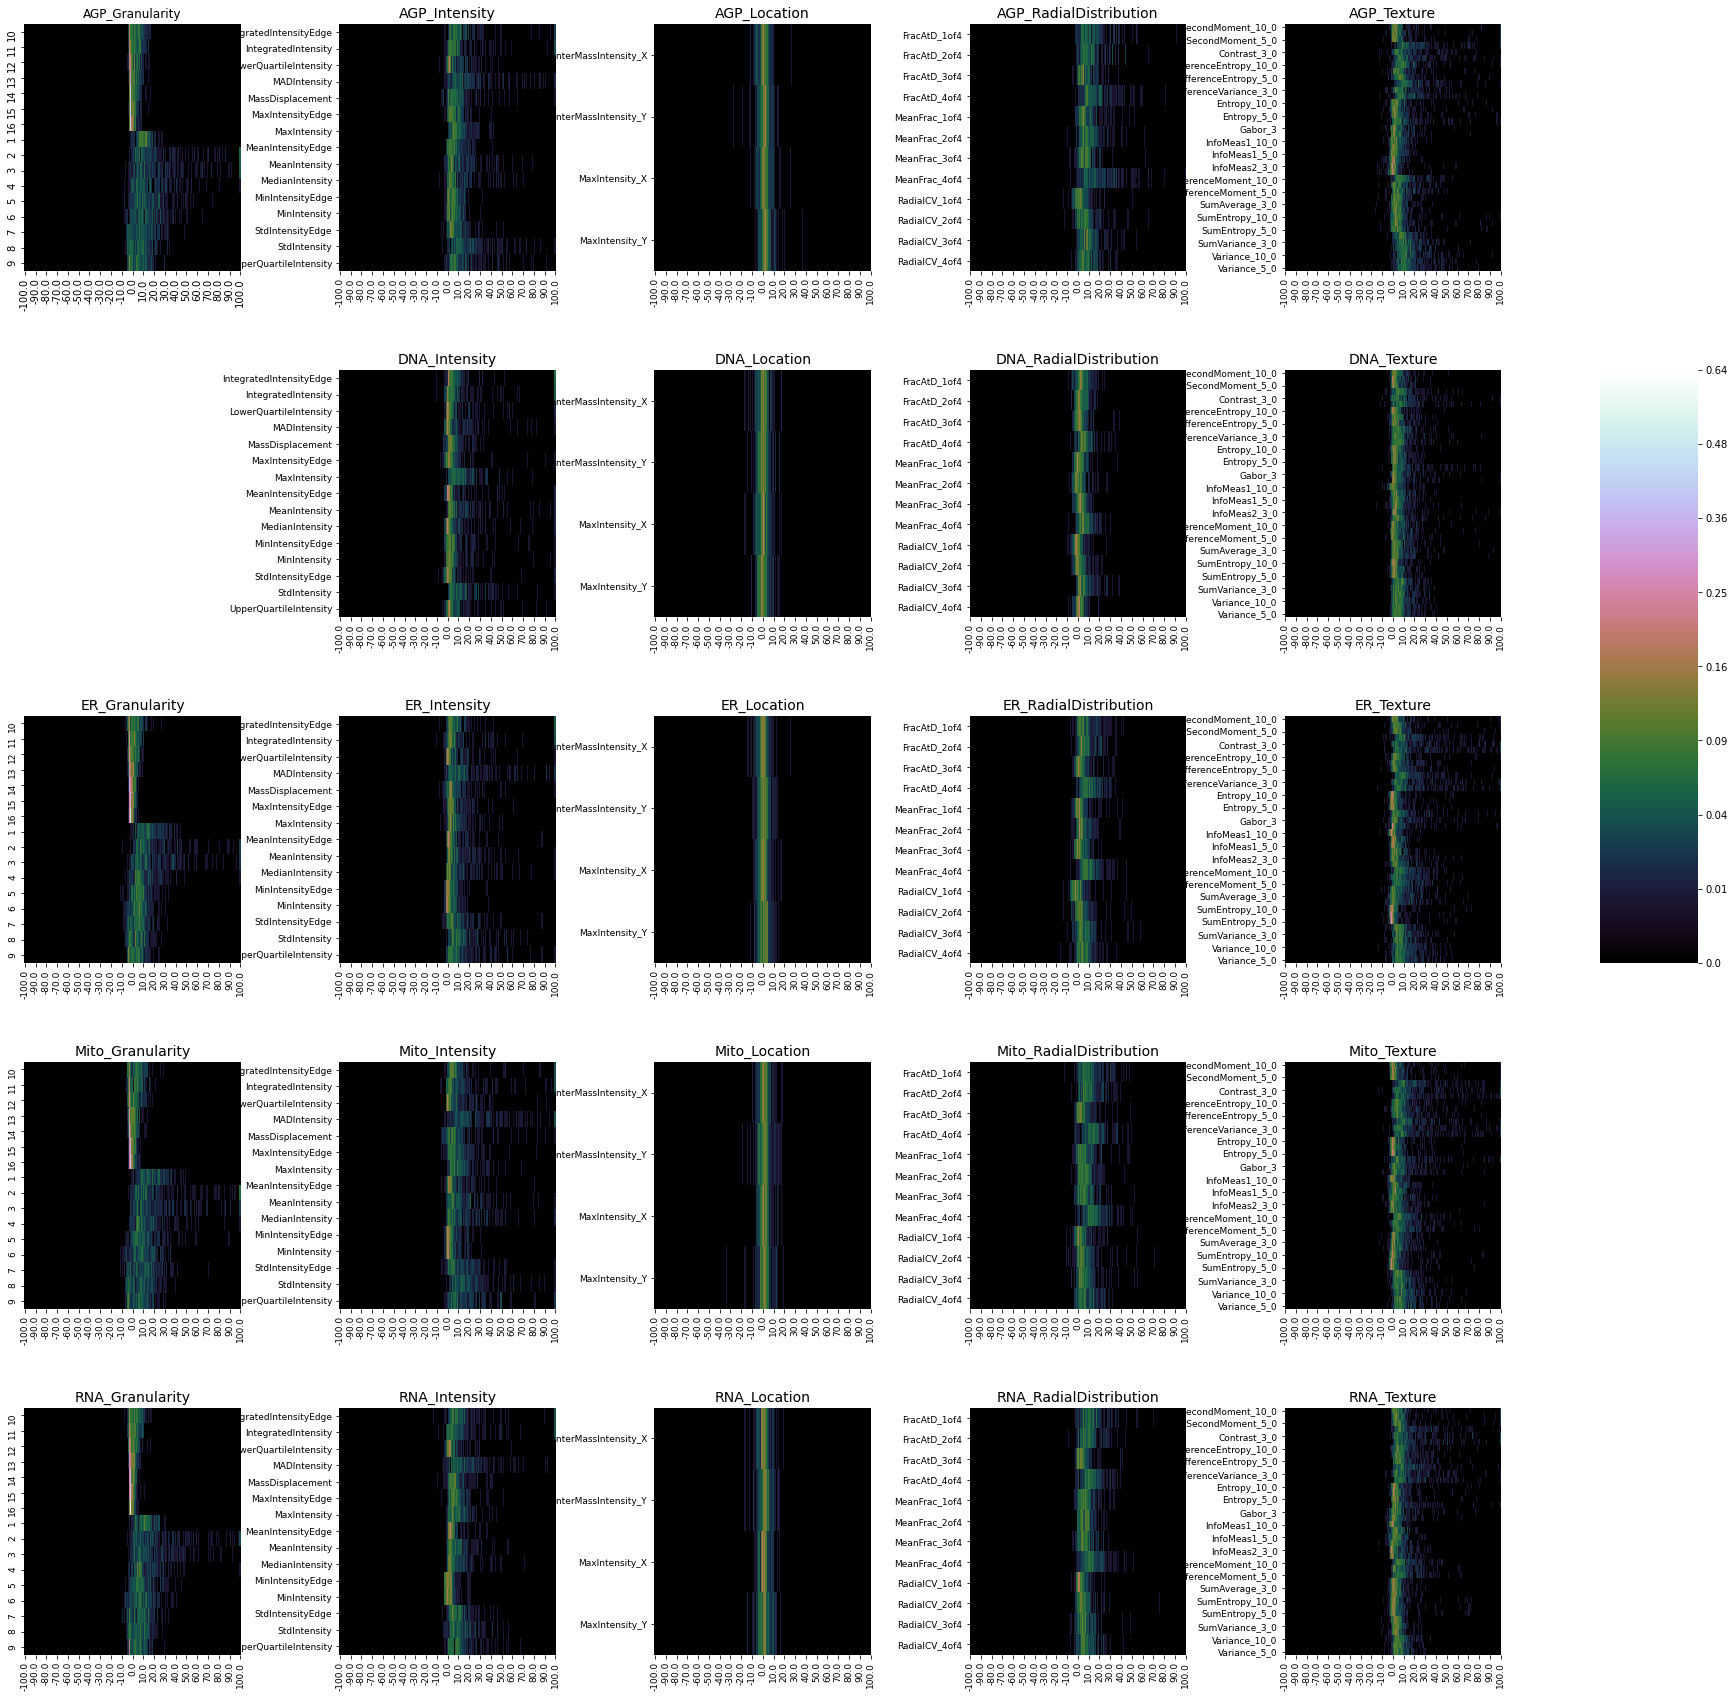

In [53]:
_, _, ch_dict = list_columns(heatmap_err)
create_heatmap_by_feature(heatmap_err.apply(lambda x: np.sqrt(x)), ch_dict)